In [78]:
# Import necessary libraries
import pandas as pd  # For data handling
import numpy as np   # For numerical computations

# Load the dataset (Ensure heart.csv is in the same folder)
df = pd.read_csv("heart.csv")

# Display first few rows
df.head()


Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [79]:
# Display dataset structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [80]:
# Count missing values in each column
df.isnull().sum()


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [81]:
# Display statistical summary of the dataset
df.describe()


Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [82]:
# Display column data types
print(df.dtypes)


Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [83]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)


In [84]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top 10 features using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X_scaled, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['Age', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_M',
       'ChestPainType_ATA', 'ExerciseAngina_Y', 'ST_Slope_Flat',
       'ST_Slope_Up'],
      dtype='object')


In [85]:
df_encoded['Cholesterol_BP'] = df_encoded['Cholesterol'] * df_encoded['RestingBP']
df_encoded['Age_Oldpeak'] = df_encoded['Age'] * df_encoded['Oldpeak']


In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train model with best parameters
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Improved Accuracy:", accuracy_best)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Improved Accuracy: 0.8695652173913043


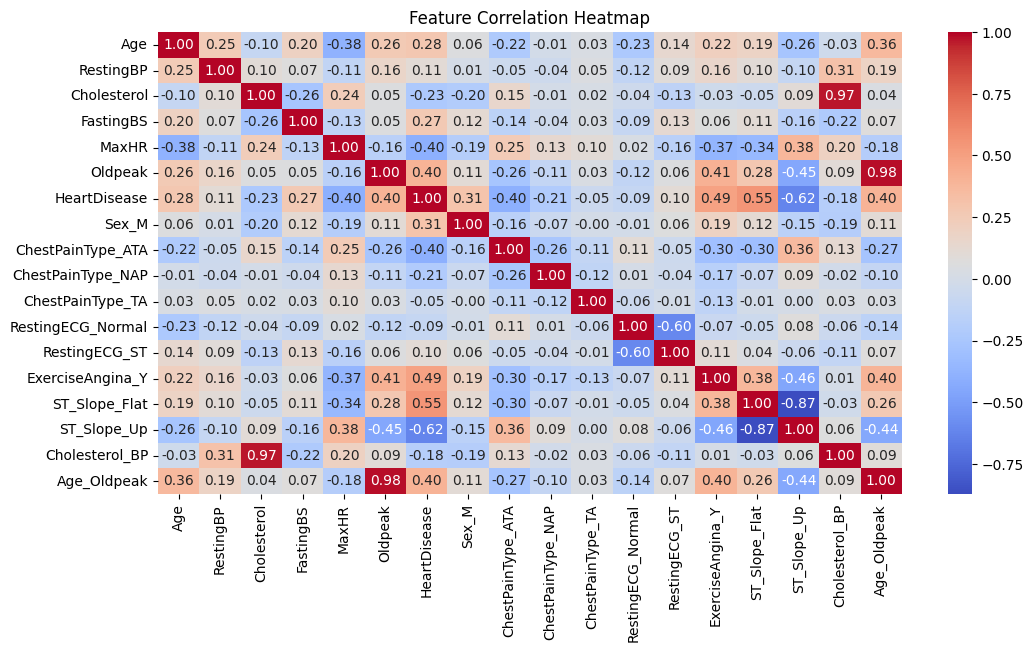

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [88]:
print(df.columns)


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [89]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=['HeartDisease'])  # Correct target column
y = df['HeartDisease'] # Define target variable

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset sizes
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (734, 11)
Testing set size: (184, 11)


In [90]:
# Display column data types to check for non-numeric values
print(df_encoded.dtypes)


Age                    int64
RestingBP              int64
Cholesterol            int64
FastingBS              int64
MaxHR                  int64
Oldpeak              float64
HeartDisease           int64
Sex_M                   bool
ChestPainType_ATA       bool
ChestPainType_NAP       bool
ChestPainType_TA        bool
RestingECG_Normal       bool
RestingECG_ST           bool
ExerciseAngina_Y        bool
ST_Slope_Flat           bool
ST_Slope_Up             bool
Cholesterol_BP         int64
Age_Oldpeak          float64
dtype: object


In [91]:
# Convert categorical variables into numerical format using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)

# Verify all columns are now numeric
print(df_encoded.dtypes)


Age                    int64
RestingBP              int64
Cholesterol            int64
FastingBS              int64
MaxHR                  int64
Oldpeak              float64
HeartDisease           int64
Sex_M                   bool
ChestPainType_ATA       bool
ChestPainType_NAP       bool
ChestPainType_TA        bool
RestingECG_Normal       bool
RestingECG_ST           bool
ExerciseAngina_Y        bool
ST_Slope_Flat           bool
ST_Slope_Up             bool
dtype: object


In [92]:
# Define features (X) and target variable (y)
X = df_encoded.drop(columns=['HeartDisease'])  # Ensure target column is correct
y = df_encoded['HeartDisease']

# Perform train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for any remaining non-numeric data
print("Data type of X_train:\n", X_train.dtypes)


Data type of X_train:
 Age                    int64
RestingBP              int64
Cholesterol            int64
FastingBS              int64
MaxHR                  int64
Oldpeak              float64
Sex_M                   bool
ChestPainType_ATA       bool
ChestPainType_NAP       bool
ChestPainType_TA        bool
RestingECG_Normal       bool
RestingECG_ST           bool
ExerciseAngina_Y        bool
ST_Slope_Flat           bool
ST_Slope_Up             bool
dtype: object


In [93]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data & transform both training and testing sets
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print a sample of transformed data
print("Sample of scaled training data:\n", X_train[:5])


Sample of scaled training data:
 [[-1.24506731 -0.70898547  0.372803    1.84260945  2.28435288 -0.09706109
   0.54060477 -0.48333575  1.87905939 -0.21350421  0.80817891 -0.48762079
  -0.83846064 -1.03325003 -0.84792072]
 [-1.8862362  -0.16628515  0.08614581 -0.5427086   1.65224147 -0.83628643
   0.54060477 -0.48333575  1.87905939 -0.21350421  0.80817891 -0.48762079
  -0.83846064 -1.03325003  1.17935554]
 [ 0.25099346  0.91911549  0.12313384  1.84260945 -0.44162756  0.08774524
   0.54060477 -0.48333575 -0.53218116 -0.21350421  0.80817891 -0.48762079
   1.19266183  0.96781995 -0.84792072]
 [-1.77937472 -0.16628515  0.10463982 -0.5427086   0.22999081 -0.83628643
  -1.84978019 -0.48333575  1.87905939 -0.21350421  0.80817891 -0.48762079
  -0.83846064 -1.03325003  1.17935554]
 [-0.28331396 -0.70898547 -1.84647842  1.84260945 -1.27127378 -0.83628643
   0.54060477 -0.48333575 -0.53218116 -0.21350421  0.80817891 -0.48762079
  -0.83846064  0.96781995 -0.84792072]]


In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on training data
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Print sample predictions
print("Sample Predictions:", y_pred[:10])


Sample Predictions: [0 1 1 1 0 1 1 0 1 1]


Model Accuracy: 0.875
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



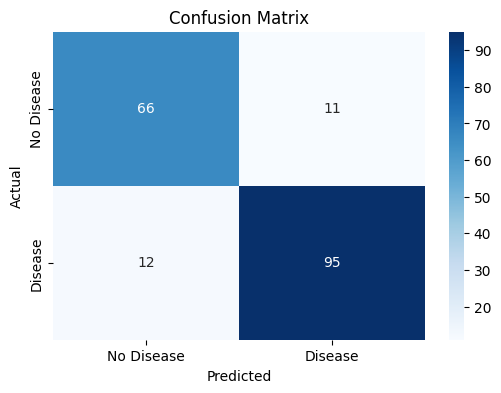

In [95]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# List of models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5),  # Default k=5
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Store results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    results[model_name] = {
        "Accuracy": accuracy,
        "Classification Report": classification_report(y_test, y_pred, output_dict=True)
    }

    print(f"{model_name} Accuracy: {accuracy:.4f}\n")


Training Logistic Regression...
Logistic Regression Accuracy: 0.8533

Training SVM...
SVM Accuracy: 0.8750

Training KNN...
KNN Accuracy: 0.8533

Training Decision Tree...
Decision Tree Accuracy: 0.8424

Training Random Forest...
Random Forest Accuracy: 0.8750



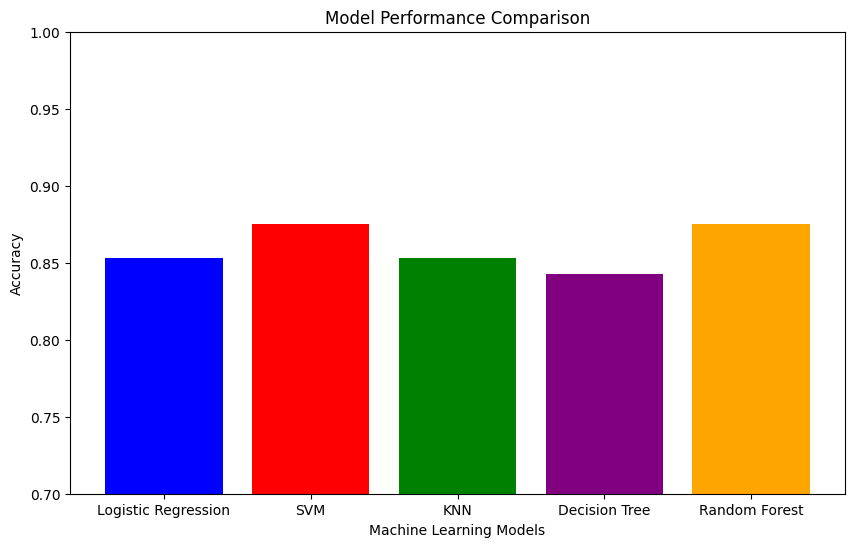

In [66]:
import matplotlib.pyplot as plt

# Extract accuracy values
model_names = list(results.keys())
accuracies = [results[model]["Accuracy"] for model in model_names]

# Plot model comparison
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'red', 'green', 'purple', 'orange'])
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.ylim(0.7, 1)  # Set Y-axis limits
plt.show()


In [72]:
# Define columns to remove
columns_to_remove = ['RestingECG', 'ChestPainType', 'ST_Slope']

# Drop only existing columns
df_selected = df_encoded.drop(columns=[col for col in columns_to_remove if col in df_encoded.columns])

# Print new shape
print("Updated dataset shape:", df_selected.shape)

# Display remaining columns
print("Remaining Columns:", df_selected.columns.tolist())



Updated dataset shape: (918, 16)
Remaining Columns: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']


In [73]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_selected.drop(columns=['HeartDisease'])  # Features
y = df_selected['HeartDisease']  # Target variable

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to verify
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (734, 15)
Testing Data Shape: (184, 15)


In [74]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# Apply Standard Scaling
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Confirm scaling applied
print("Feature Scaling Applied!")


Feature Scaling Applied!


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
}

# Train and evaluate models
results = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Store results
    results[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred)
    }

# Display results
for model, metrics in results.items():
    print(f"\n🔹 {model} Accuracy: {metrics['Accuracy']:.4f}")



Training Logistic Regression...

Training Random Forest...

Training XGBoost...

🔹 Logistic Regression Accuracy: 0.8533

🔹 Random Forest Accuracy: 0.8750

🔹 XGBoost Accuracy: 0.8859


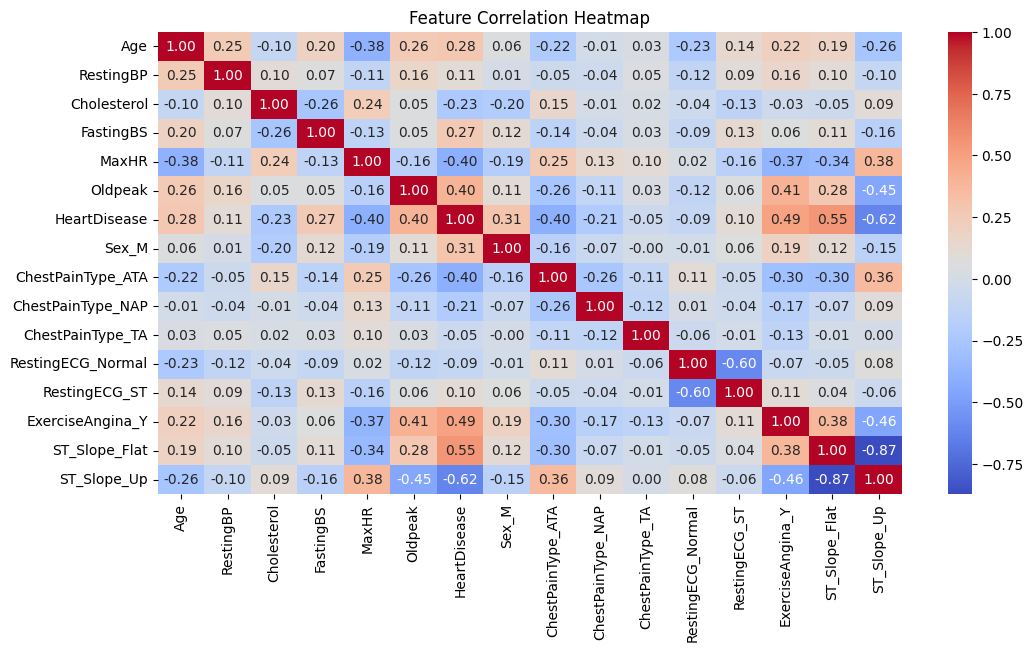

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_selected.corr()

# Set figure size
plt.figure(figsize=(12, 6))

# Generate heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Set title and show plot
plt.title("Feature Correlation Heatmap")
plt.show()


Model Accuracy: 0.8858695652173914
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86        77
           1       0.91      0.90      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



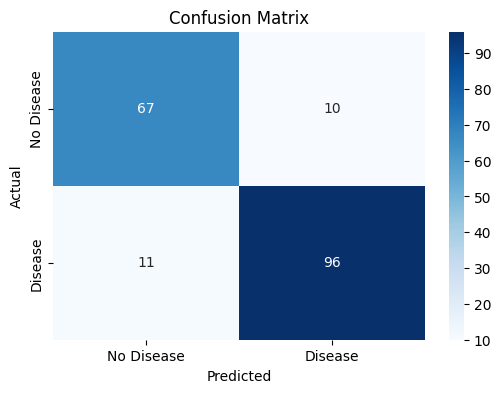

In [77]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()